# Growth rate analysis with Bioscreen or any 96-well plate

This notebook contain workflow to prepare and analyze the results of microbial growth in Bioscreen plate or any 96-well plate.

### Requiements: 
    . numpy >= 1.8.0
    . scipy >= 0.17.0
    . pysam >= 0.8
    . matplotlib >= 1.4.0
    . seaborn
    . pytime
    . parsedatatime
    . pytimeparse

### Install requirenments:

In [ ]:
!pip install -r requirements.txt

In [ ]:
# Install other requierments with pip install
!pip install parsedatetime

In [ ]:
!pip install pytimeparse

In [ ]:
!pip install pytime

#### Import libraries

In [46]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as DT
from datetime import timedelta
import parsedatetime
from pytimeparse import parse

%matplotlib inline

In [2]:
# Load file with metadata.
# Copy the layout of your experiment on multi-well plate to "Metadata_layout.csv" file.
# Change the name of the file, and save it.

metadata = pd.read_csv("Metadata_layout.csv", sep = ',')
metadata.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20
0,Well1,Well11,Well21,Well31,Well41,Well51,Well61,Well71,Well81,Well91,Well101,Well111,Well121,Well131,Well141,Well151,Well161,Well171,Well181,Well191
1,Well2,Well12,Well22,Well32,Well42,Well52,Well62,Well72,Well82,Well92,Well102,Well112,Well122,Well132,Well142,Well152,Well162,Well172,Well182,Well192
2,Well3,Well4,Well23,Well6,Well7,Well8,Well9,Well10,Well11,Well12,Well4,Well5,Well24,Well7,Well8,Well9,Well10,Well11,Well12,Well13
3,Well4,Well14,Well24,Well34,Well44,Well54,Well64,Well74,Well84,Well94,Well104,Well114,Well124,Well134,Well144,Well154,Well164,Well174,Well184,Well194
4,Well5,Well15,Well25,Well35,Well45,Well55,Well65,Well75,Well85,Well95,Well105,Well115,Well125,Well135,Well145,Well155,Well165,Well175,Well185,Well195


In [104]:
# Example layout of new experiment

metadata = pd.read_csv("Metadata_example_results_dots.csv", sep = ',')
metadata.head() 

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20
0,WT.1,WT.1,Blank,WT.etOH.1,WT.etOH.1,Blank,WT.1,WT.1,Blank,WT.etOH.1,WT.1,WT.1,Blank,WT.etOH.1,WT.etOH.1,Blank,WT.1,WT.1,Blank,WT.etOH.1
1,WT.2,WT.2,Blank,WT.etOH.2,WT.etOH.2,Blank,WT.2,WT.2,Blank,WT.etOH.2,WT.2,WT.2,Blank,WT.etOH.2,WT.etOH.2,Blank,WT.2,WT.2,Blank,WT.etOH.2
2,CID1.1,CID1.1,Blank,CID1.etOH.1,CID1.etOH.1,Blank,CID1.1,CID1.1,Blank,CID1.etOH.1,CID1.1,CID1.1,Blank,CID1.etOH.1,CID1.etOH.1,Blank,CID1.1,CID1.1,Blank,CID1.etOH.1
3,CID1.2,CID1.2,Blank,CID1.etOH.2,CID1.etOH.2,Blank,CID1.2,CID1.2,Blank,CID1.etOH.2,CID1.2,CID1.2,Blank,CID1.etOH.2,CID1.etOH.2,Blank,CID1.2,CID1.2,Blank,CID1.etOH.2
4,CID11.1,CID11.1,Blank,CID11.etOH.1,CID11.etOH.1,Blank,CID11.1,CID11.1,Blank,CID11.etOH.1,CID11.1,CID11.1,Blank,CID11.etOH.1,CID11.etOH.1,Blank,CID11.1,CID11.1,Blank,CID11.etOH.1


In [105]:
# Make one column from all columns in the layout

column_names = pd.concat([metadata[col_name] for col_name in metadata.columns],ignore_index=True)
column_names.head()

0       WT.1
1       WT.2
2     CID1.1
3     CID1.2
4    CID11.1
dtype: object

In [106]:
# I case you want to avoid to use some column, for example "Col15":

# Make one column from all columns in the layout without 15th column
column_names_without15 = pd.concat([metadata[col_name] for col_name in metadata.columns if '15' not in col_name], ignore_index=True)
#column_names_without15.head()

In [107]:
#Save your new column as DataFrame in .csv file

column_names.to_csv("kolumna.csv", sep = '\t')

/home/lidia/anaconda3/envs/dm4/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
# Load the DataFrame

kolumna = pd.read_csv("kolumna.csv", sep = '\t',names=["Lp", "Mutant"] )
kolumna.head()

,Lp,Mutant
0,0,WT.1
1,1,WT.2
2,2,CID1.1
3,3,CID1.2
4,4,CID11.1


In [109]:
# Transpose the DataFrame to obtain the sample name in rows

kolumna_metadata_transpozycja = kolumna.transpose()
kolumna_metadata_transpozycja.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Lp,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Mutant,WT.1,WT.2,CID1.1,CID1.2,CID11.1,CID11.2,CID13.1,CID13.2,CID16.1,CID16.2,...,WT.etOH.1,WT.etOH.2,CID1.etOH.1,CID1.etOH.2,CID11.etOH.1,CID11.etOH.2,CID13.etOH.1,CID13.etOH.2,CID16.etOH.1,CID16.etOH.2


In [148]:
# Load the raw results of the experiment ob multi-well plate

raw_results = pd.read_csv("raw_results_example.csv", sep=';')
raw_results.head()

,Time,Well 101,Well 102,Well 103,Well 104,Well 105,Well 106,Well 107,Well 108,Well 109,...,Well 291,Well 292,Well 293,Well 294,Well 295,Well 296,Well 297,Well 298,Well 299,Well 300
0,00:00:05,0.176,0.165,0.055,0.103,0.078,0.147,0.099,0.122,0.120,...,0.144,0.165,0.146,0.114,0.175,0.138,0.150,0.171,0.191,0.108
1,00:11:34,0.086,0.094,0.150,0.123,0.118,0.080,0.051,0.056,0.061,...,0.093,0.134,0.143,0.149,0.097,0.142,0.122,0.129,0.143,0.164
2,00:26:30,0.102,0.108,0.180,0.133,0.134,0.093,0.065,0.064,0.069,...,0.106,0.117,0.136,0.131,0.092,0.128,0.117,0.118,0.139,0.154
3,00:41:29,0.112,0.107,0.186,0.137,0.132,0.093,0.065,0.066,0.071,...,0.120,0.141,0.148,0.153,0.103,0.147,0.129,0.128,0.157,0.157
4,00:56:26,0.102,0.095,0.145,0.115,0.109,0.082,0.048,0.053,0.058,...,0.121,0.125,0.144,0.142,0.100,0.139,0.127,0.120,0.148,0.148


In [149]:
# Drop column "Time" - We will make new cilumn with time in Hours instead of %H:%M:%S.

raw_results_bezczas = raw_results.drop(['Time'], axis=1)
#raw_results_bezczas.head()

In [150]:
# Transpose DataFrame to add column with proper column names from the metadata layout

cos_nowego = raw_results_bezczas.transpose()
#cos_nowego.head()

In [151]:
##

# jeśli to nie zadziała, to wyrzuć [mutant] w miejscu "cos_nowego["Sample"][mutant]", a następnie odpal jeszcze raz.
# Później wpisz znów [mutant]

for mutant in range(len(kolumna)):
    cos_nowego["Sample"] = kolumna["Mutant"][mutant]
cos_nowego.head()

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,Sample
Well 101,0.176,0.086,0.102,0.112,0.102,0.107,0.108,0.110,0.140,0.113,...,0.247,0.246,0.247,0.248,0.248,0.249,0.250,0.251,0.252,CID16.etOH.2
Well 102,0.165,0.094,0.108,0.107,0.095,0.096,0.107,0.107,0.127,0.106,...,0.341,0.340,0.341,0.341,0.342,0.344,0.345,0.346,0.347,CID16.etOH.2
Well 103,0.055,0.150,0.180,0.186,0.145,0.143,0.161,0.162,0.170,0.159,...,0.263,0.265,0.263,0.266,0.264,0.265,0.264,0.264,0.265,CID16.etOH.2
Well 104,0.103,0.123,0.133,0.137,0.115,0.116,0.130,0.136,0.142,0.132,...,0.389,0.389,0.387,0.389,0.390,0.394,0.393,0.393,0.392,CID16.etOH.2
Well 105,0.078,0.118,0.134,0.132,0.109,0.109,0.112,0.115,0.133,0.114,...,0.357,0.357,0.360,0.361,0.361,0.362,0.365,0.365,0.368,CID16.etOH.2


In [152]:
for mutant in range(len(kolumna)):
    cos_nowego["Sample"][mutant] = kolumna["Mutant"][mutant]
cos_nowego.head()

/home/lidia/anaconda3/envs/dm4/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,Sample
Well 101,0.176,0.086,0.102,0.112,0.102,0.107,0.108,0.110,0.140,0.113,...,0.247,0.246,0.247,0.248,0.248,0.249,0.250,0.251,0.252,WT.1
Well 102,0.165,0.094,0.108,0.107,0.095,0.096,0.107,0.107,0.127,0.106,...,0.341,0.340,0.341,0.341,0.342,0.344,0.345,0.346,0.347,WT.2
Well 103,0.055,0.150,0.180,0.186,0.145,0.143,0.161,0.162,0.170,0.159,...,0.263,0.265,0.263,0.266,0.264,0.265,0.264,0.264,0.265,CID1.1
Well 104,0.103,0.123,0.133,0.137,0.115,0.116,0.130,0.136,0.142,0.132,...,0.389,0.389,0.387,0.389,0.390,0.394,0.393,0.393,0.392,CID1.2
Well 105,0.078,0.118,0.134,0.132,0.109,0.109,0.112,0.115,0.133,0.114,...,0.357,0.357,0.360,0.361,0.361,0.362,0.365,0.365,0.368,CID11.1


In [153]:
with_index =cos_nowego.set_index("Sample")
with_index.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
Sample,,,,,,,,,,,,,,,,,,,,,
WT.1,0.176,0.086,0.102,0.112,0.102,0.107,0.108,0.110,0.140,0.113,...,0.247,0.247,0.246,0.247,0.248,0.248,0.249,0.250,0.251,0.252
WT.2,0.165,0.094,0.108,0.107,0.095,0.096,0.107,0.107,0.127,0.106,...,0.341,0.341,0.340,0.341,0.341,0.342,0.344,0.345,0.346,0.347
CID1.1,0.055,0.150,0.180,0.186,0.145,0.143,0.161,0.162,0.170,0.159,...,0.267,0.263,0.265,0.263,0.266,0.264,0.265,0.264,0.264,0.265
CID1.2,0.103,0.123,0.133,0.137,0.115,0.116,0.130,0.136,0.142,0.132,...,0.387,0.389,0.389,0.387,0.389,0.390,0.394,0.393,0.393,0.392
CID11.1,0.078,0.118,0.134,0.132,0.109,0.109,0.112,0.115,0.133,0.114,...,0.358,0.357,0.357,0.360,0.361,0.361,0.362,0.365,0.365,0.368


In [154]:
indexed=with_index.transpose()
indexed.head()

Sample,WT.1,WT.2,CID1.1,CID1.2,CID11.1,CID11.2,CID13.1,CID13.2,CID16.1,CID16.2,...,WT.etOH.1,WT.etOH.2,CID1.etOH.1,CID1.etOH.2,CID11.etOH.1,CID11.etOH.2,CID13.etOH.1,CID13.etOH.2,CID16.etOH.1,CID16.etOH.2
0,0.176,0.165,0.055,0.103,0.078,0.147,0.099,0.122,0.120,0.061,...,0.144,0.165,0.146,0.114,0.175,0.138,0.150,0.171,0.191,0.108
1,0.086,0.094,0.150,0.123,0.118,0.080,0.051,0.056,0.061,0.102,...,0.093,0.134,0.143,0.149,0.097,0.142,0.122,0.129,0.143,0.164
2,0.102,0.108,0.180,0.133,0.134,0.093,0.065,0.064,0.069,0.122,...,0.106,0.117,0.136,0.131,0.092,0.128,0.117,0.118,0.139,0.154
3,0.112,0.107,0.186,0.137,0.132,0.093,0.065,0.066,0.071,0.116,...,0.120,0.141,0.148,0.153,0.103,0.147,0.129,0.128,0.157,0.157
4,0.102,0.095,0.145,0.115,0.109,0.082,0.048,0.053,0.058,0.104,...,0.121,0.125,0.144,0.142,0.100,0.139,0.127,0.120,0.148,0.148


In [155]:
raw_results['Time'].head()

0    00:00:05
1    00:11:34
2    00:26:30
3    00:41:29
4    00:56:26
Name: Time, dtype: object

In [160]:
column_times = raw_results['Time']
column_times.head()

0    00:00:05
1    00:11:34
2    00:26:30
3    00:41:29
4    00:56:26
Name: Time, dtype: object

In [161]:
### nie wiem czy to potrzebne

for i in range(len(column_times)):
    column_times[i] = parse(column_times[i], '%H:%M:%S')

/home/lidia/anaconda3/envs/dm4/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [162]:
column_times.head()

0       5
1     694
2    1590
3    2489
4    3386
Name: Time, dtype: object

In [163]:
for i in range(len(column_times)):
    column_times[i] = column_times[i]/3600.0

/home/lidia/anaconda3/envs/dm4/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [164]:
column_times.head()

0    0.00138889
1      0.192778
2      0.441667
3      0.691389
4      0.940556
Name: Time, dtype: object

In [165]:
indexed['Time'] = column_times
indexed.head()

Sample,WT.1,WT.2,CID1.1,CID1.2,CID11.1,CID11.2,CID13.1,CID13.2,CID16.1,CID16.2,...,WT.etOH.2,CID1.etOH.1,CID1.etOH.2,CID11.etOH.1,CID11.etOH.2,CID13.etOH.1,CID13.etOH.2,CID16.etOH.1,CID16.etOH.2,Time
0,0.176,0.165,0.055,0.103,0.078,0.147,0.099,0.122,0.120,0.061,...,0.165,0.146,0.114,0.175,0.138,0.150,0.171,0.191,0.108,0.00138889
1,0.086,0.094,0.150,0.123,0.118,0.080,0.051,0.056,0.061,0.102,...,0.134,0.143,0.149,0.097,0.142,0.122,0.129,0.143,0.164,0.192778
2,0.102,0.108,0.180,0.133,0.134,0.093,0.065,0.064,0.069,0.122,...,0.117,0.136,0.131,0.092,0.128,0.117,0.118,0.139,0.154,0.441667
3,0.112,0.107,0.186,0.137,0.132,0.093,0.065,0.066,0.071,0.116,...,0.141,0.148,0.153,0.103,0.147,0.129,0.128,0.157,0.157,0.691389
4,0.102,0.095,0.145,0.115,0.109,0.082,0.048,0.053,0.058,0.104,...,0.125,0.144,0.142,0.100,0.139,0.127,0.120,0.148,0.148,0.940556


In [166]:
indexed_plus_time = indexed.set_index('Time')
indexed_plus_time.head()

Sample,WT.1,WT.2,CID1.1,CID1.2,CID11.1,CID11.2,CID13.1,CID13.2,CID16.1,CID16.2,...,WT.etOH.1,WT.etOH.2,CID1.etOH.1,CID1.etOH.2,CID11.etOH.1,CID11.etOH.2,CID13.etOH.1,CID13.etOH.2,CID16.etOH.1,CID16.etOH.2
Time,,,,,,,,,,,,,,,,,,,,,
0.001389,0.176,0.165,0.055,0.103,0.078,0.147,0.099,0.122,0.120,0.061,...,0.144,0.165,0.146,0.114,0.175,0.138,0.150,0.171,0.191,0.108
0.192778,0.086,0.094,0.150,0.123,0.118,0.080,0.051,0.056,0.061,0.102,...,0.093,0.134,0.143,0.149,0.097,0.142,0.122,0.129,0.143,0.164
0.441667,0.102,0.108,0.180,0.133,0.134,0.093,0.065,0.064,0.069,0.122,...,0.106,0.117,0.136,0.131,0.092,0.128,0.117,0.118,0.139,0.154
0.691389,0.112,0.107,0.186,0.137,0.132,0.093,0.065,0.066,0.071,0.116,...,0.120,0.141,0.148,0.153,0.103,0.147,0.129,0.128,0.157,0.157
0.940556,0.102,0.095,0.145,0.115,0.109,0.082,0.048,0.053,0.058,0.104,...,0.121,0.125,0.144,0.142,0.100,0.139,0.127,0.120,0.148,0.148


In [167]:
indexed_plus_time.to_csv("probna_tabelka.csv", sep='\t')

In [68]:
#ROBOCZY



#######
indexed_plus_time.to_csv("table_without index.csv", sep='\t', index = False)

### PLOTS

In [168]:
krzywe_Time = pd.read_csv("probna_tabelka.csv", sep = "\t")

#krzywe_Time.set_index("Time")

#column_names=krzywe_Time.columns


In [169]:
krzywe_Time.head()

,Time,WT.1,WT.2,CID1.1,CID1.2,CID11.1,CID11.2,CID13.1,CID13.2,CID16.1,...,WT.etOH.1.5,WT.etOH.2.5,CID1.etOH.1.5,CID1.etOH.2.5,CID11.etOH.1.5,CID11.etOH.2.5,CID13.etOH.1.5,CID13.etOH.2.5,CID16.etOH.1.5,CID16.etOH.2.5
0,0.001389,0.176,0.165,0.055,0.103,0.078,0.147,0.099,0.122,0.120,...,0.144,0.165,0.146,0.114,0.175,0.138,0.150,0.171,0.191,0.108
1,0.192778,0.086,0.094,0.150,0.123,0.118,0.080,0.051,0.056,0.061,...,0.093,0.134,0.143,0.149,0.097,0.142,0.122,0.129,0.143,0.164
2,0.441667,0.102,0.108,0.180,0.133,0.134,0.093,0.065,0.064,0.069,...,0.106,0.117,0.136,0.131,0.092,0.128,0.117,0.118,0.139,0.154
3,0.691389,0.112,0.107,0.186,0.137,0.132,0.093,0.065,0.066,0.071,...,0.120,0.141,0.148,0.153,0.103,0.147,0.129,0.128,0.157,0.157
4,0.940556,0.102,0.095,0.145,0.115,0.109,0.082,0.048,0.053,0.058,...,0.121,0.125,0.144,0.142,0.100,0.139,0.127,0.120,0.148,0.148


In [170]:
def przeszukaj(nazwa,colum_names):
    """nazwa (str),
    column_names (df)
    """
    ile_kopi=sum([nazwa in column for column in column_names])
    return ile_kopi 


nazwy_orinalow=[orginal for orginal in column_names if przeszukaj(orginal,column_names)>1]
print(nazwy_orinalow)

['WT.1', 'WT.2', 'CID1.1', 'CID1.2', 'CID11.1', 'CID11.2', 'CID13.1', 'CID13.2', 'CID16.1', 'CID16.2', 'WT.1', 'WT.2', 'CID1.1', 'CID1.2', 'CID11.1', 'CID11.2', 'CID13.1', 'CID13.2', 'CID16.1', 'CID16.2', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'WT.etOH.1', 'WT.etOH.2', 'CID1.etOH.1', 'CID1.etOH.2', 'CID11.etOH.1', 'CID11.etOH.2', 'CID13.etOH.1', 'CID13.etOH.2', 'CID16.etOH.1', 'CID16.etOH.2', 'WT.etOH.1', 'WT.etOH.2', 'CID1.etOH.1', 'CID1.etOH.2', 'CID11.etOH.1', 'CID11.etOH.2', 'CID13.etOH.1', 'CID13.etOH.2', 'CID16.etOH.1', 'CID16.etOH.2', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'WT.1', 'WT.2', 'CID1.1', 'CID1.2', 'CID11.1', 'CID11.2', 'CID13.1', 'CID13.2', 'CID16.1', 'CID16.2', 'WT.1', 'WT.2', 'CID1.1', 'CID1.2', 'CID11.1', 'CID11.2', 'CID13.1', 'CID13.2', 'CID16.1', 'CID16.2', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'WT.etOH.1', 'WT.

In [171]:
column_names= krzywe_Time.columns
time=krzywe_Time["Time"]

In [172]:
def wyciagnij_wszystkie_powtorzenia(nazwa_orginalu, column_names=column_names):
    kolumny=np.concatenate([np.array(krzywe_Time[name]) for name in column_names if nazwa_orginalu in name])
    
    czasy=np.concatenate([np.array(time) for name in column_names if nazwa_orginalu in name])
    
    zebrana_dataframe= pd.DataFrame(data={'Time': czasy, "OD":kolumny})
    return zebrana_dataframe

In [173]:
proba=wyciagnij_wszystkie_powtorzenia(nazwy_orinalow[1])
proba.head()

,Time,OD
0,0.001389,0.165
1,0.192778,0.094
2,0.441667,0.108
3,0.691389,0.107
4,0.940556,0.095


In [174]:
mozliwe_szczepy=['WT', 'CID','Blank']

def zrob_nowe_wiersze(column_name):
    proba=wyciagnij_wszystkie_powtorzenia(column_name)
    
    przed_p_kropka=column_name.split(".")[0]
    
    
    proba["strain"]=next(szczep for szczep in mozliwe_szczepy if szczep in przed_p_kropka)
    proba["name"]=column_name
    return proba

lista_nowy_df=[zrob_nowe_wiersze(column_name) for column_name in nazwy_orinalow]

splaszczony_df=pd.concat(lista_nowy_df)

WT
CID
Blank


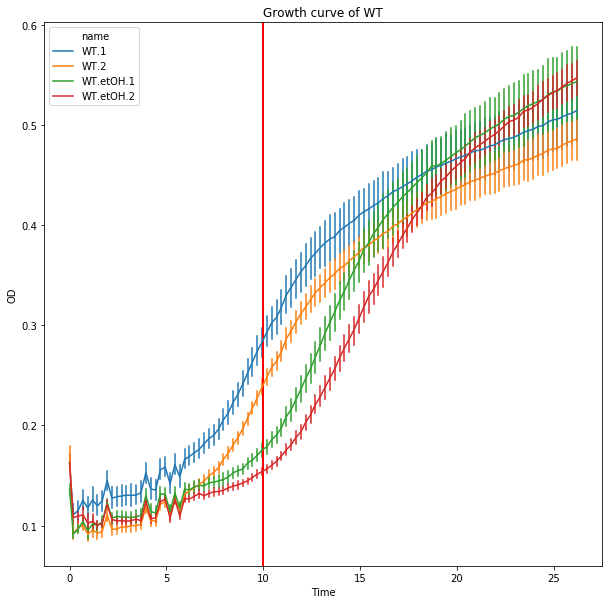

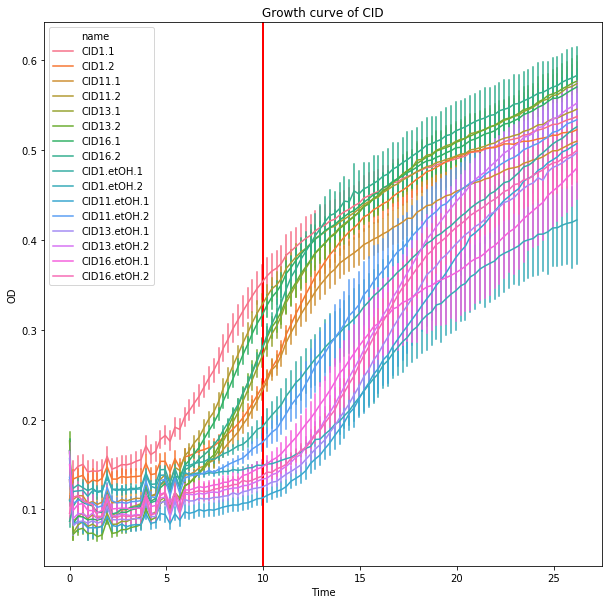

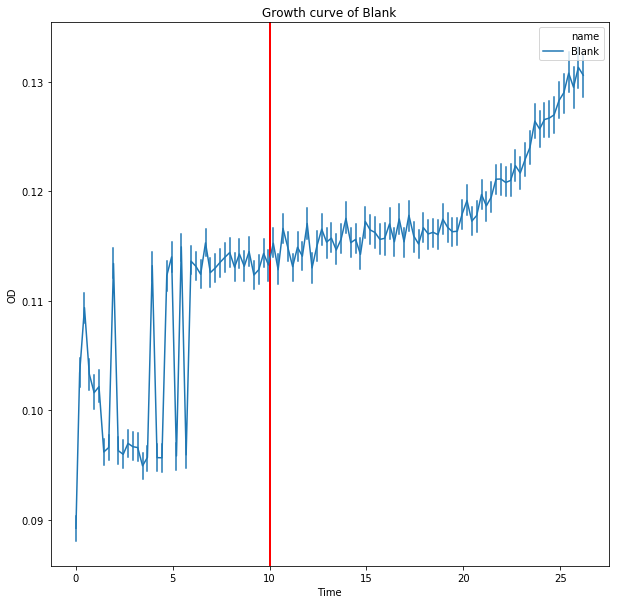

In [175]:
### dla wszystkich szczepow

for szczep_name in mozliwe_szczepy:
    print(szczep_name)
    tylko_szczep_32=splaszczony_df[splaszczony_df["strain"]==szczep_name]
    f = plt.figure(figsize=(10,10))
    plt.title("Growth curve of {}".format(szczep_name))
    plt.axvline(x=10, linewidth=2, color='r')
    sns.lineplot(x="Time", y="OD", data=tylko_szczep_32, hue="name",err_style="bars")
   # f.savefig("{}_8.png".format(szczep_name))

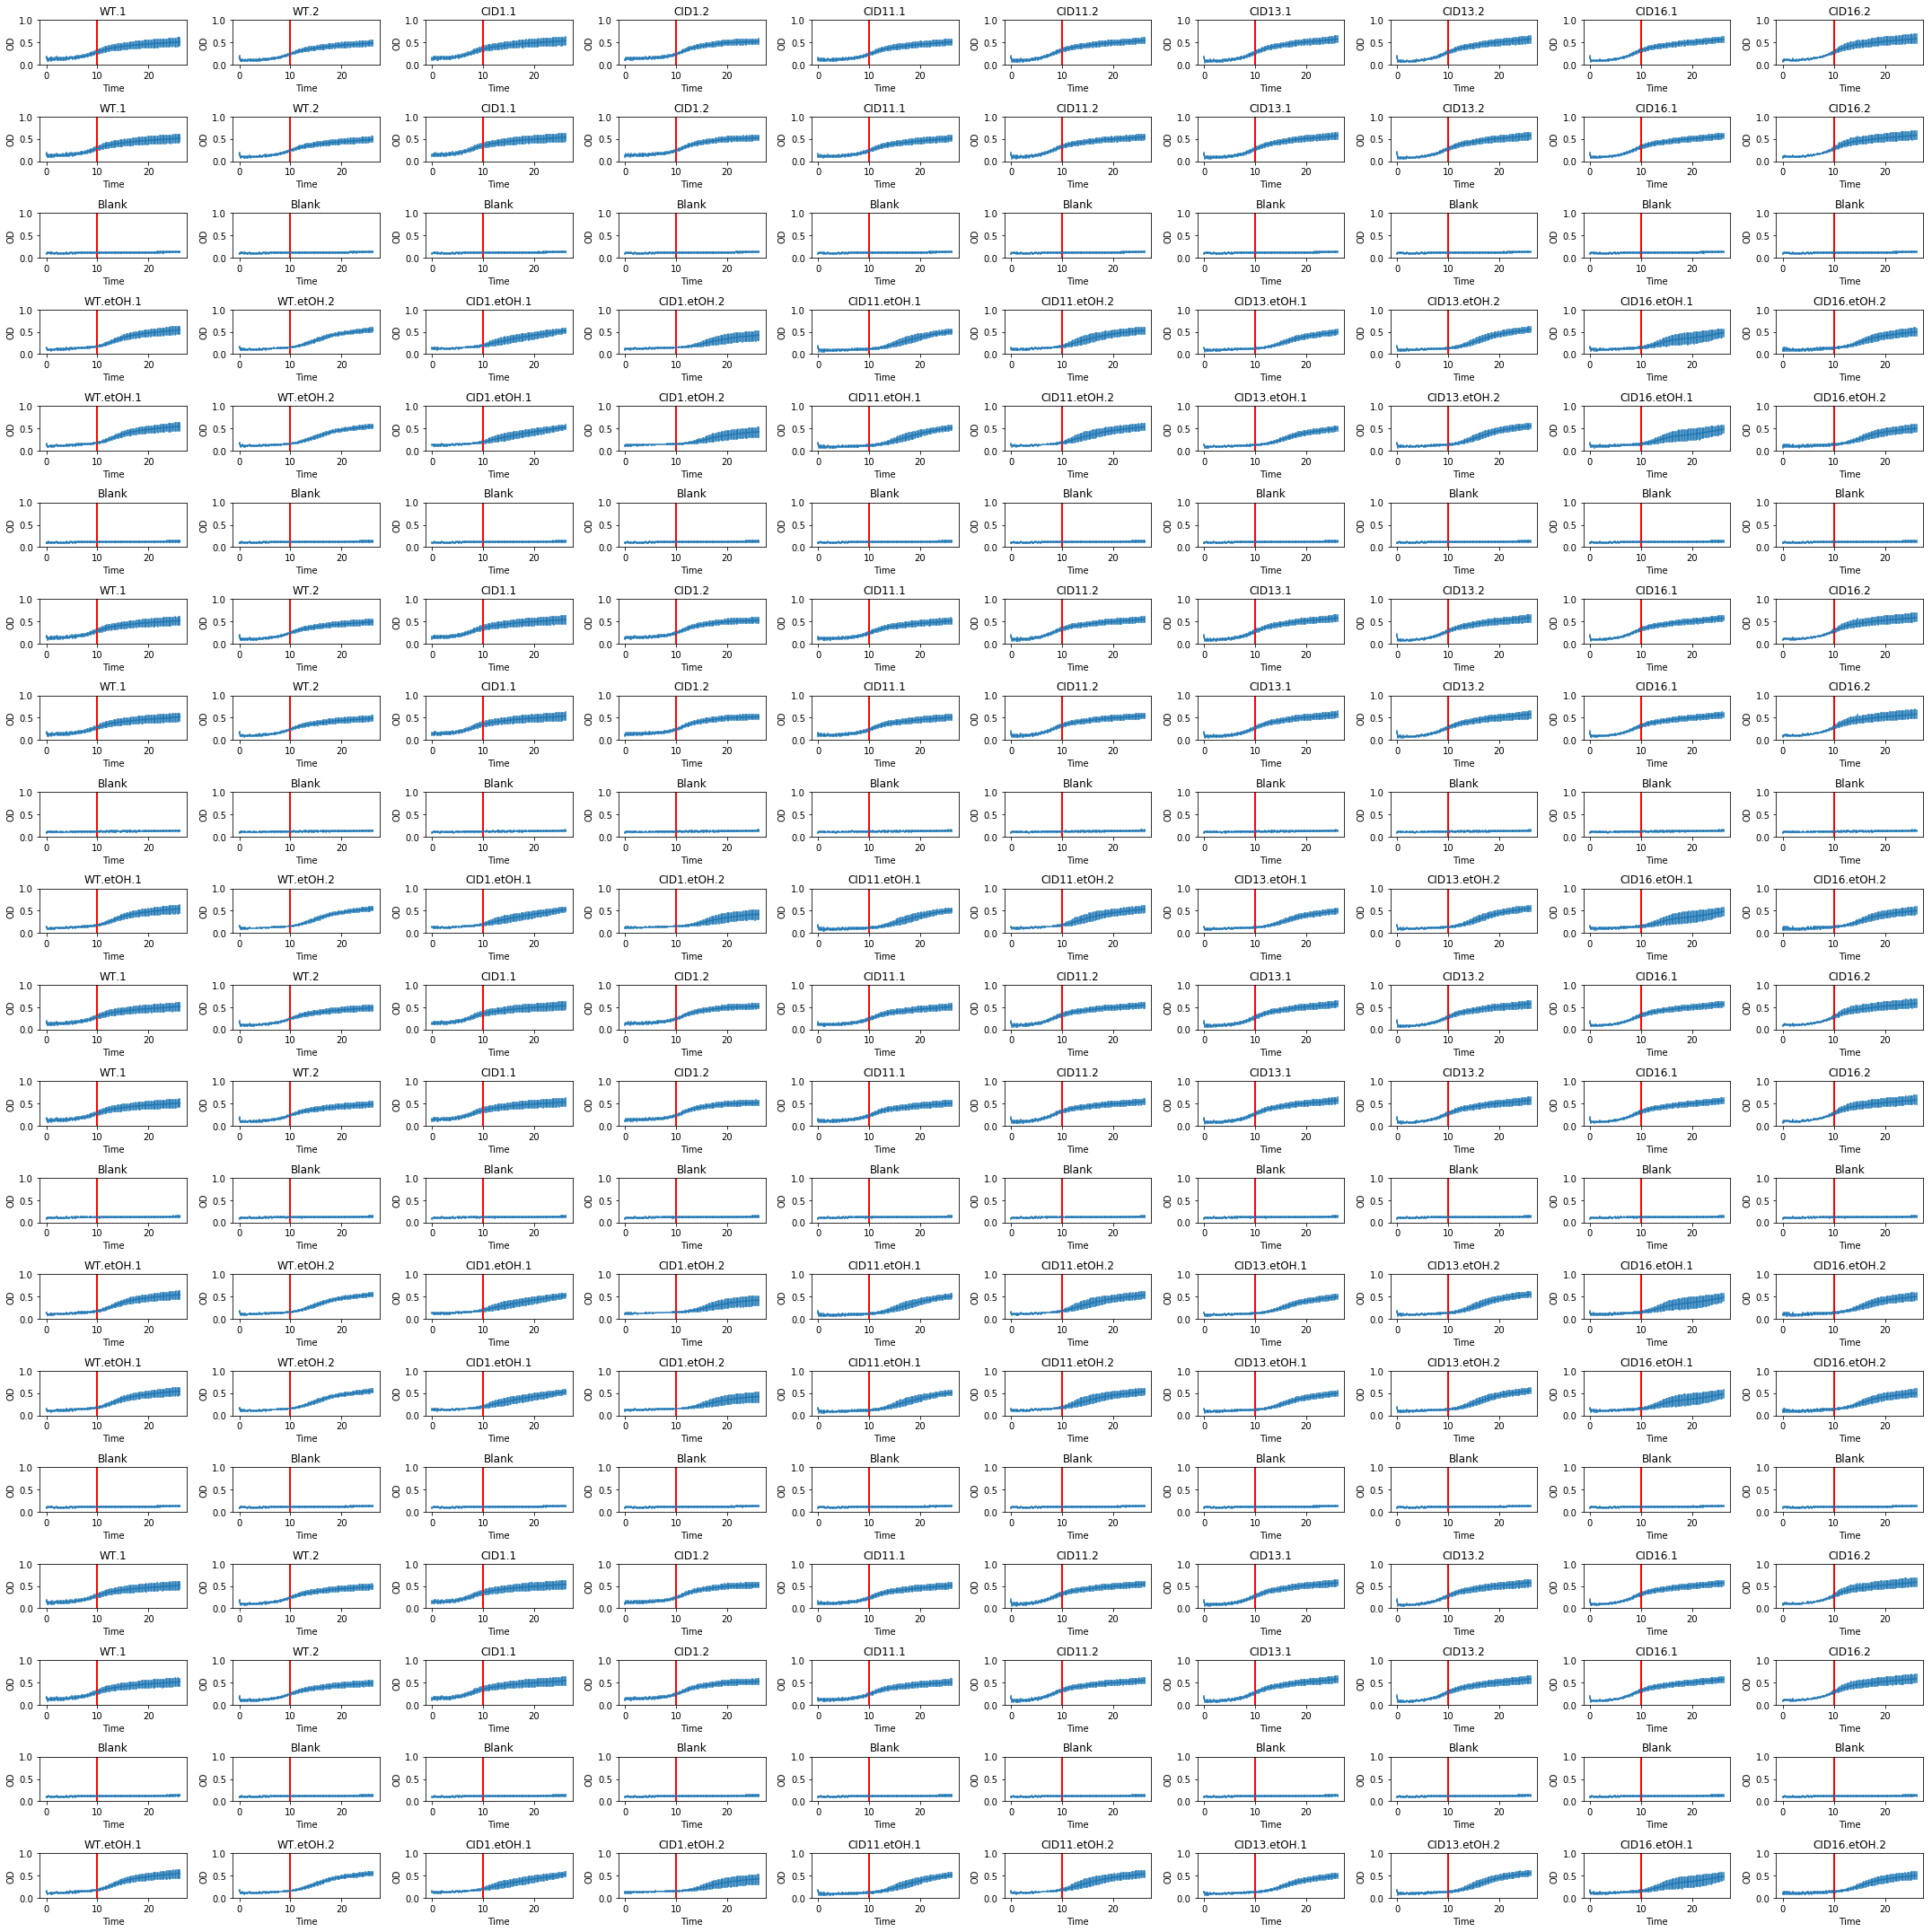

In [178]:
#column_names= krzywe_Time.columns
#time=krzywe_Time["Time"]

f = plt.figure(figsize=(30,30))

len(column_names)
for siatka_n, column_name in enumerate(nazwy_orinalow):
    proba=wyciagnij_wszystkie_powtorzenia(column_name)

    plt.subplot(20,10, siatka_n+1)
    plt.title(column_name)
    plt.ylim([0,1])
    plt.axvline(x=10, linewidth=2, color='r')
    sns.lineplot(data=proba, x="Time", y="OD",err_style="bars")
    #plt.plot(time, krzywe_Time[column_name])
    
plt.tight_layout()
#f.savefig("all_figures_mean.pdf")

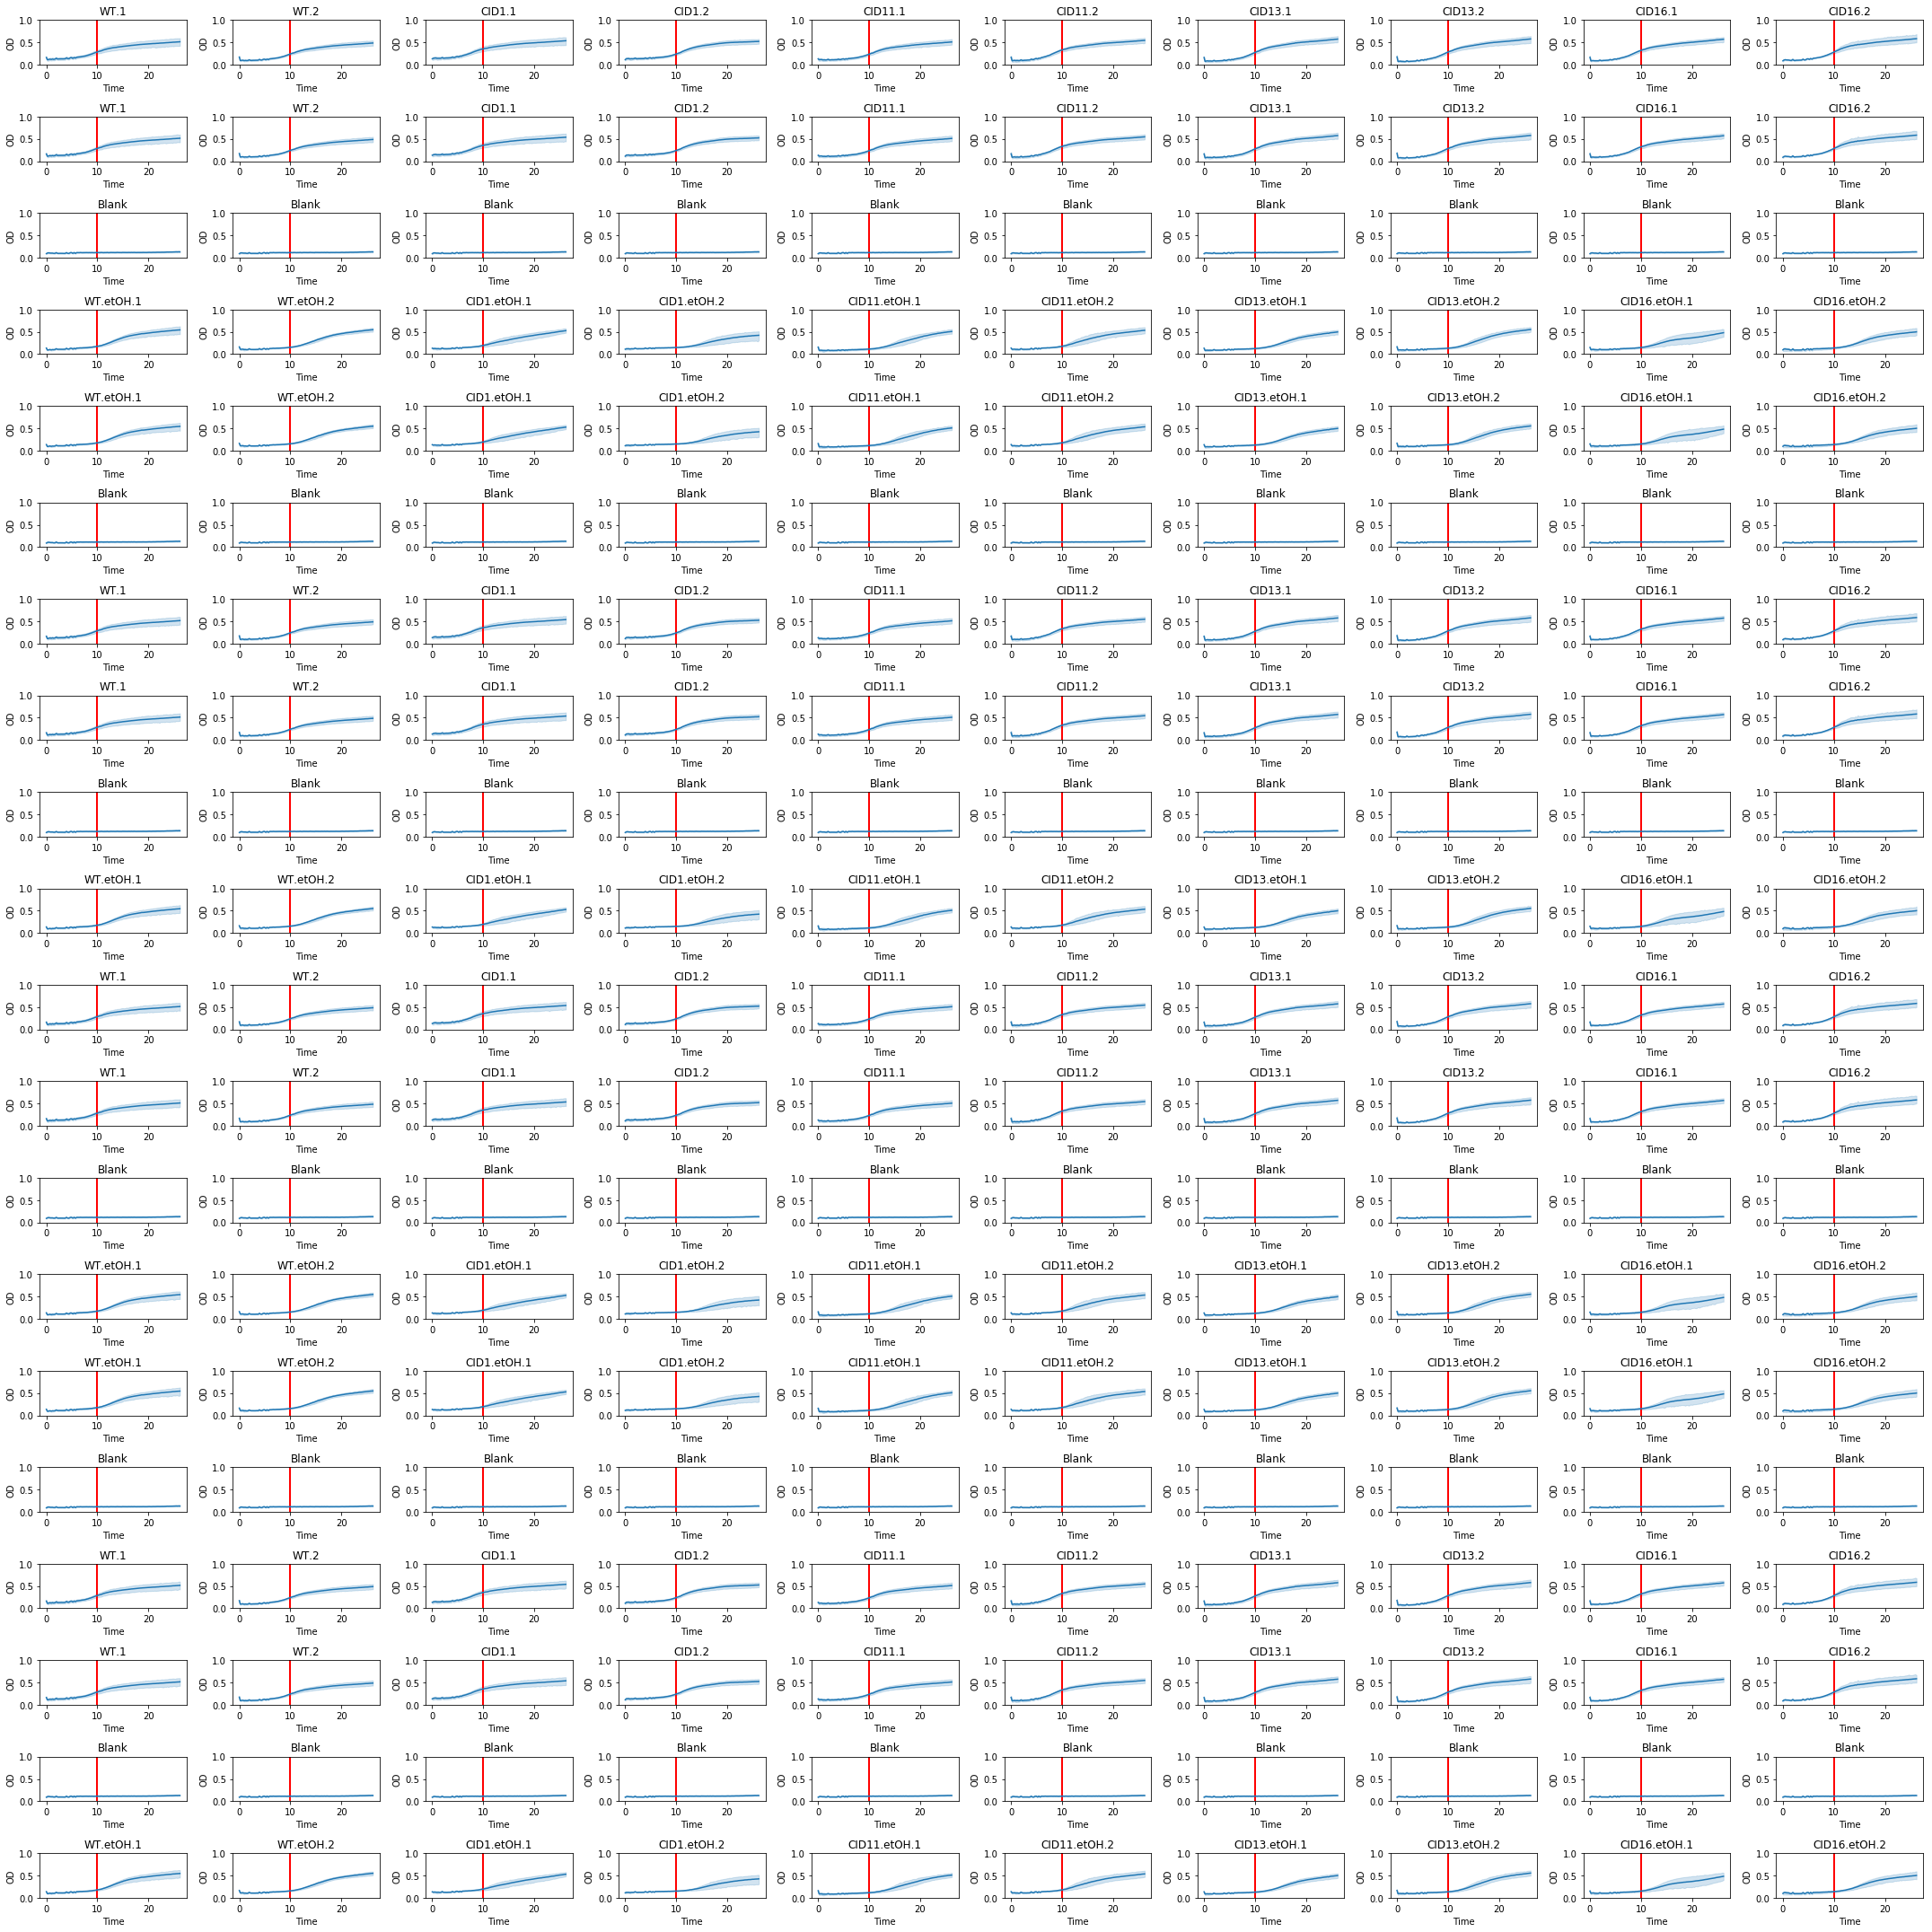

In [180]:
#column_names= krzywe_Time.columns
#time=krzywe_Time["Time"]

f = plt.figure(figsize=(30,30))

len(column_names)
for siatka_n, column_name in enumerate(nazwy_orinalow):
    proba=wyciagnij_wszystkie_powtorzenia(column_name)

    plt.subplot(20, 10, siatka_n+1)
    plt.title(column_name)
    plt.ylim([0,1])
    plt.axvline(x=10, linewidth=2, color='r')
    sns.lineplot(data=proba, x="Time", y="OD",err_style="band")
    #plt.plot(time, krzywe_Time[column_name])
    
plt.tight_layout()
#f.savefig("all_figures.pdf")

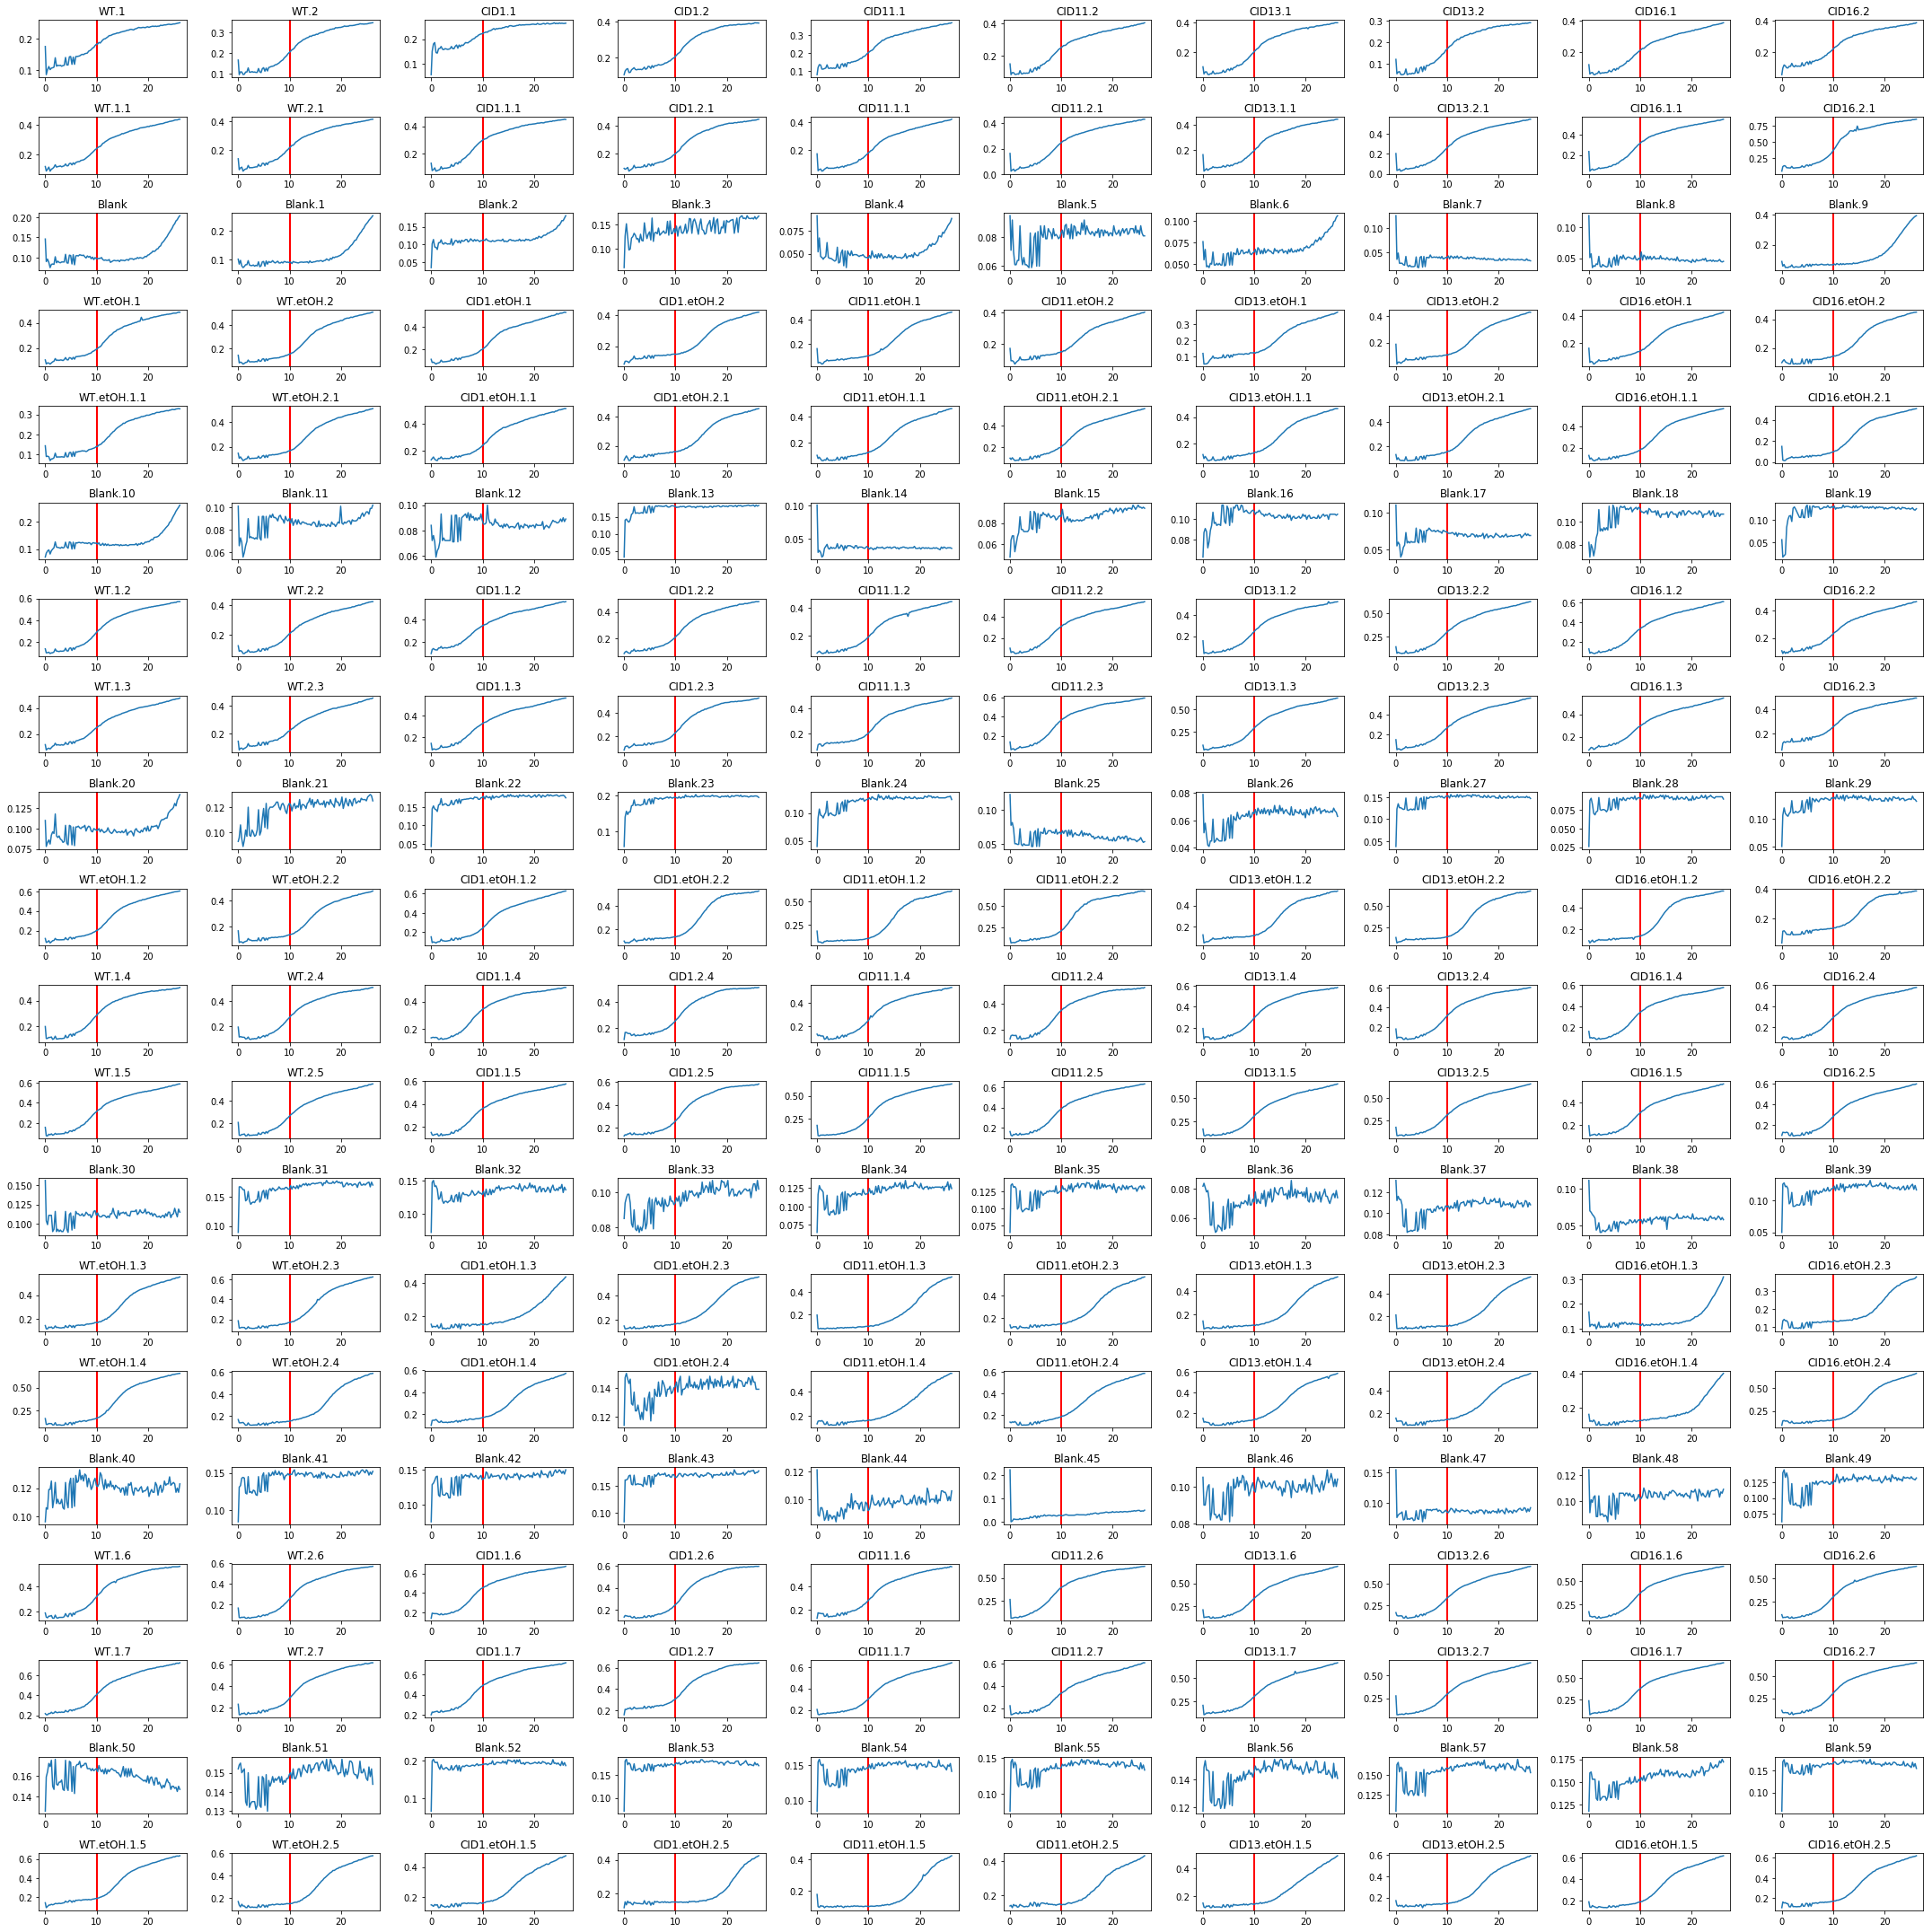

In [181]:
column_names= krzywe_Time.columns
time=krzywe_Time["Time"]

f = plt.figure(figsize=(30,30))

len(column_names)
for siatka_n, column_name in enumerate(column_names[1:]):
    plt.subplot(20, 10, siatka_n+1)
    plt.title(column_name)
#    plt.ylim([0,0.8])
    plt.axvline(x=10, linewidth=2, color='r')
    plt.plot(time, krzywe_Time[column_name])
    
plt.tight_layout()
#f.savefig("all_figures_2.pdf")

In [ ]:
#nieudane próby przygotowania danych do pyphe

In [46]:
krzywe_Time_without_first_cell = krzywe_Time
krzywe_Time_without_first_cell.head()

,Time,JB22.1,JB22.2,JB22ΔCID1.1,JB22ΔCID1.2,JB22ΔCID11.1,JB22ΔCID11.2,JB22ΔCID13.1,JB22ΔCID13.2,JB22ΔCID16.1,...,Blank_etOH5,Blank_etOH5.1,Blank_etOH10,Blank_etOH10.1,BlankH2O2_0.2,BlankH2O2_0.2.1,BlankH2O2.2,BlankH2O2.2.1,Blank.12,Blank.13
0,0.001111,0.107,0.091,0.076,0.101,0.086,0.128,0.142,0.164,0.130,...,0.084,0.114,0.120,0.094,0.158,0.094,0.096,0.103,0.139,0.057
1,1.202500,0.109,0.107,0.130,0.118,0.123,0.122,0.103,0.112,0.104,...,0.125,0.107,0.130,0.126,0.052,0.097,0.061,0.062,0.049,0.067
2,2.452500,0.114,0.118,0.133,0.122,0.131,0.130,0.110,0.115,0.109,...,0.129,0.104,0.125,0.128,0.053,0.097,0.062,0.063,0.048,0.066
3,3.702500,0.125,0.140,0.140,0.136,0.151,0.146,0.134,0.132,0.125,...,0.138,0.115,0.131,0.129,0.055,0.107,0.068,0.070,0.057,0.078
4,4.951944,0.134,0.179,0.158,0.151,0.182,0.178,0.167,0.159,0.150,...,0.138,0.117,0.131,0.131,0.056,0.106,0.066,0.071,0.055,0.079


In [45]:
kkw = krzywe_Time_without_first_cell.rename(columns={"Time": ""})
kkw.head()

,JB22.1,JB22.2,JB22ΔCID1.1,JB22ΔCID1.2,JB22ΔCID11.1,JB22ΔCID11.2,JB22ΔCID13.1,JB22ΔCID13.2,JB22ΔCID16.1,JB22ΔCID16.2,...,Blank_etOH5,Blank_etOH5.1,Blank_etOH10,Blank_etOH10.1,BlankH2O2_0.2,BlankH2O2_0.2.1,BlankH2O2.2,BlankH2O2.2.1,Blank.12,Blank.13
0,0.107,0.091,0.076,0.101,0.086,0.128,0.142,0.164,0.130,0.138,...,0.084,0.114,0.120,0.094,0.158,0.094,0.096,0.103,0.139,0.057
1,0.109,0.107,0.130,0.118,0.123,0.122,0.103,0.112,0.104,0.140,...,0.125,0.107,0.130,0.126,0.052,0.097,0.061,0.062,0.049,0.067
2,0.114,0.118,0.133,0.122,0.131,0.130,0.110,0.115,0.109,0.149,...,0.129,0.104,0.125,0.128,0.053,0.097,0.062,0.063,0.048,0.066
3,0.125,0.140,0.140,0.136,0.151,0.146,0.134,0.132,0.125,0.170,...,0.138,0.115,0.131,0.129,0.055,0.107,0.068,0.070,0.057,0.078
4,0.134,0.179,0.158,0.151,0.182,0.178,0.167,0.159,0.150,0.208,...,0.138,0.117,0.131,0.131,0.056,0.106,0.066,0.071,0.055,0.079


In [41]:
time_as_index = kkw.set_index([1])
time_as_index.head()

KeyError: 1

In [47]:
kk = time_as_index.rename(index=str, columns={"Time": ""})
kk.head()

,JB22.1,JB22.2,JB22ΔCID1.1,JB22ΔCID1.2,JB22ΔCID11.1,JB22ΔCID11.2,JB22ΔCID13.1,JB22ΔCID13.2,JB22ΔCID16.1,JB22ΔCID16.2,...,Blank_etOH5,Blank_etOH5.1,Blank_etOH10,Blank_etOH10.1,BlankH2O2_0.2,BlankH2O2_0.2.1,BlankH2O2.2,BlankH2O2.2.1,Blank.12,Blank.13
Time,,,,,,,,,,,,,,,,,,,,,
0.0011111111111111113,0.107,0.091,0.076,0.101,0.086,0.128,0.142,0.164,0.130,0.138,...,0.084,0.114,0.120,0.094,0.158,0.094,0.096,0.103,0.139,0.057
1.2025,0.109,0.107,0.130,0.118,0.123,0.122,0.103,0.112,0.104,0.140,...,0.125,0.107,0.130,0.126,0.052,0.097,0.061,0.062,0.049,0.067
2.4525,0.114,0.118,0.133,0.122,0.131,0.130,0.110,0.115,0.109,0.149,...,0.129,0.104,0.125,0.128,0.053,0.097,0.062,0.063,0.048,0.066
3.7025,0.125,0.140,0.140,0.136,0.151,0.146,0.134,0.132,0.125,0.170,...,0.138,0.115,0.131,0.129,0.055,0.107,0.068,0.070,0.057,0.078
4.951944444444443,0.134,0.179,0.158,0.151,0.182,0.178,0.167,0.159,0.150,0.208,...,0.138,0.117,0.131,0.131,0.056,0.106,0.066,0.071,0.055,0.079


In [30]:
kk.to_csv("table_pyphe.csv", sep='\t')

## Use pyphe-growthcurves module

"pyphe-growthcurves
Python module, including command line interface, for on-parametric characterisation of microbial growth curves written by Stephan Kamrad (stephan.kamrad@crick.ac.uk).
Source of " Source and code: https://github.com/Bahler-Lab/pyphe-growthcurves

In [48]:
#Pyphe growthcurves
!python pyphe-growthcurves_3pkt.py --input table_pyphe.csv --plots

The first column must contain the timepoint and these must only have numeric values (no units or other string).
Traceback (most recent call last):
  File "pyphe-growthcurves_3pkt.py", line 144, in <module>
    assert all(gdata.index[i] <= gdata.index[i+1] for i in range(len(gdata.index)-1)), 'Timepoints must be in ascending order.'
AssertionError: Timepoints must be in ascending order.


In [132]:
wyniki_pyphe_2 = pd.read_csv("probna_tabelka_bezczas.csv", sep = ',')
wyniki_pyphe_2.head()


TypeError: parser_f() got an unexpected keyword argument 'index'

In [128]:
wyniki_pyphe_transposed = wyniki_pyphe.transpose()
wyniki_pyphe_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Unnamed: 0,0.001111,1.2025,2.4525,3.7025,4.951944,6.201667,7.451667,8.701667,9.951667,11.201667,...,16.201667,17.451667,18.701667,19.951667,21.201667,22.451667,23.701667,24.951667,26.201667,27.451667
JB22.1,0.107000,0.1090,0.1140,0.1250,0.134000,0.149000,0.177000,0.224000,0.290000,0.356000,...,0.479000,0.495000,0.507000,0.520000,0.529000,0.540000,0.548000,0.551000,0.557000,0.561000
JB22.2,0.091000,0.1070,0.1180,0.1400,0.179000,0.239000,0.311000,0.376000,0.413000,0.438000,...,0.508000,0.520000,0.529000,0.539000,0.545000,0.552000,0.563000,0.570000,0.579000,0.586000
JB22ΔCID1.1,0.076000,0.1300,0.1330,0.1400,0.158000,0.189000,0.243000,0.319000,0.391000,0.443000,...,0.550000,0.565000,0.579000,0.588000,0.599000,0.611000,0.619000,0.624000,0.631000,0.638000
JB22ΔCID1.2,0.101000,0.1180,0.1220,0.1360,0.151000,0.184000,0.237000,0.312000,0.389000,0.447000,...,0.539000,0.549000,0.560000,0.567000,0.573000,0.574000,0.579000,0.581000,0.589000,0.597000


In [129]:
wyniki_pyphe_transposed.reset_index(drop=False)
wyniki_pyphe_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Unnamed: 0,0.001111,1.2025,2.4525,3.7025,4.951944,6.201667,7.451667,8.701667,9.951667,11.201667,...,16.201667,17.451667,18.701667,19.951667,21.201667,22.451667,23.701667,24.951667,26.201667,27.451667
JB22.1,0.107000,0.1090,0.1140,0.1250,0.134000,0.149000,0.177000,0.224000,0.290000,0.356000,...,0.479000,0.495000,0.507000,0.520000,0.529000,0.540000,0.548000,0.551000,0.557000,0.561000
JB22.2,0.091000,0.1070,0.1180,0.1400,0.179000,0.239000,0.311000,0.376000,0.413000,0.438000,...,0.508000,0.520000,0.529000,0.539000,0.545000,0.552000,0.563000,0.570000,0.579000,0.586000
JB22ΔCID1.1,0.076000,0.1300,0.1330,0.1400,0.158000,0.189000,0.243000,0.319000,0.391000,0.443000,...,0.550000,0.565000,0.579000,0.588000,0.599000,0.611000,0.619000,0.624000,0.631000,0.638000
JB22ΔCID1.2,0.101000,0.1180,0.1220,0.1360,0.151000,0.184000,0.237000,0.312000,0.389000,0.447000,...,0.539000,0.549000,0.560000,0.567000,0.573000,0.574000,0.579000,0.581000,0.589000,0.597000


In [145]:
pyphe_wyniki = pd.read_csv("Bioscreen_stresy_lagphase_maxslope_short.csv", sep = '\t')
pyphe_wyniki.head()

,Mutant,initial_biomass,lag,t_max,max_slope,r2,y-intercept,x-intercept
0,WT,0.110000,8.701667,9.951667,0.0528,1.000000,-0.235448,4.459242
1,WT,0.105333,6.201667,7.451667,0.0548,0.999131,-0.099685,1.819063
2,CID1,0.113000,7.451667,8.701667,0.0592,0.999757,-0.197472,3.335676
3,CID1,0.113667,7.451667,8.701667,0.0608,0.999942,-0.216395,3.559123
4,CID11,0.113333,6.201667,7.451667,0.0544,0.999352,-0.099371,1.826667


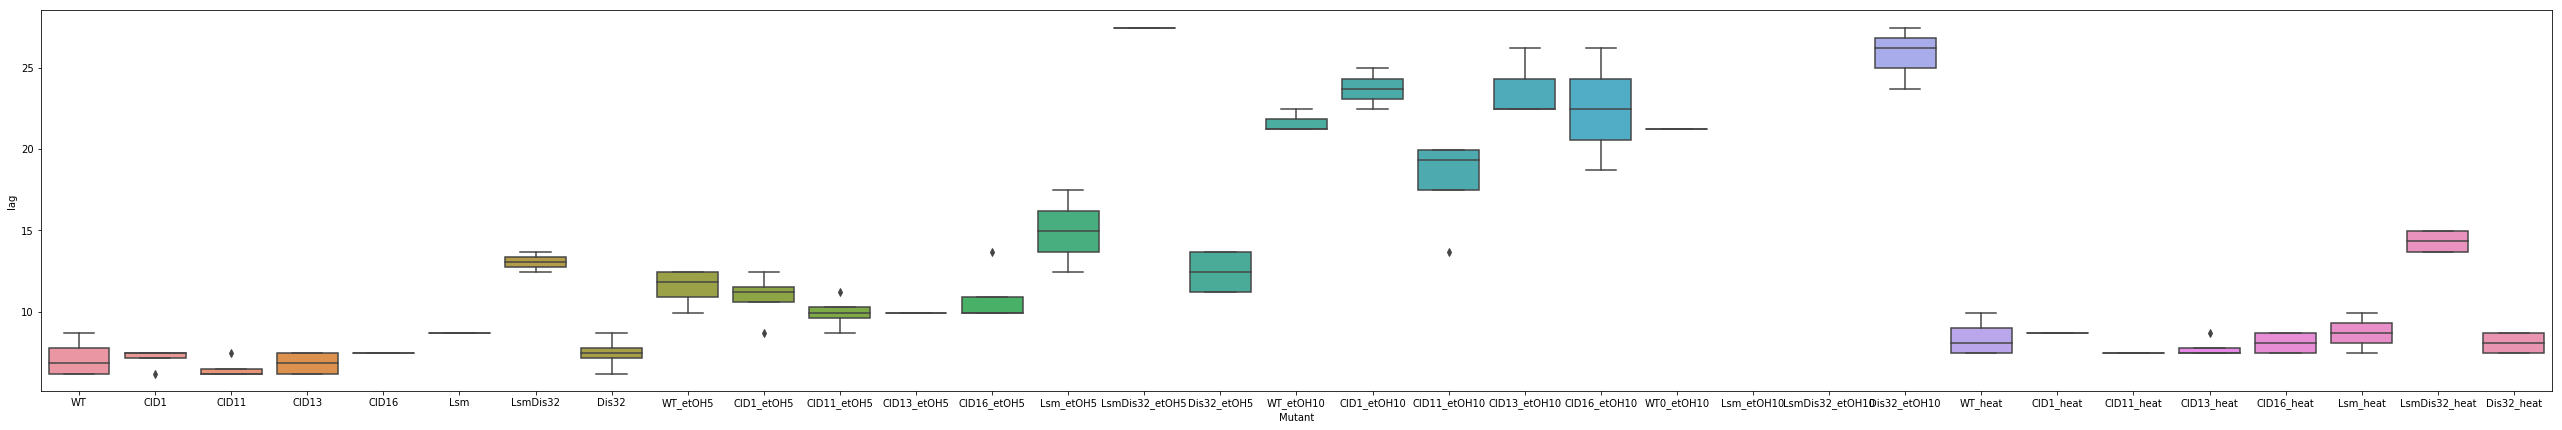

In [146]:
# lagfaza
f = plt.figure(figsize=(45,7))
sns.boxplot(x=pyphe_wyniki["Mutant"], y=pyphe_wyniki["lag"])
f.savefig("pyphe_lag_stres_20190517.png")

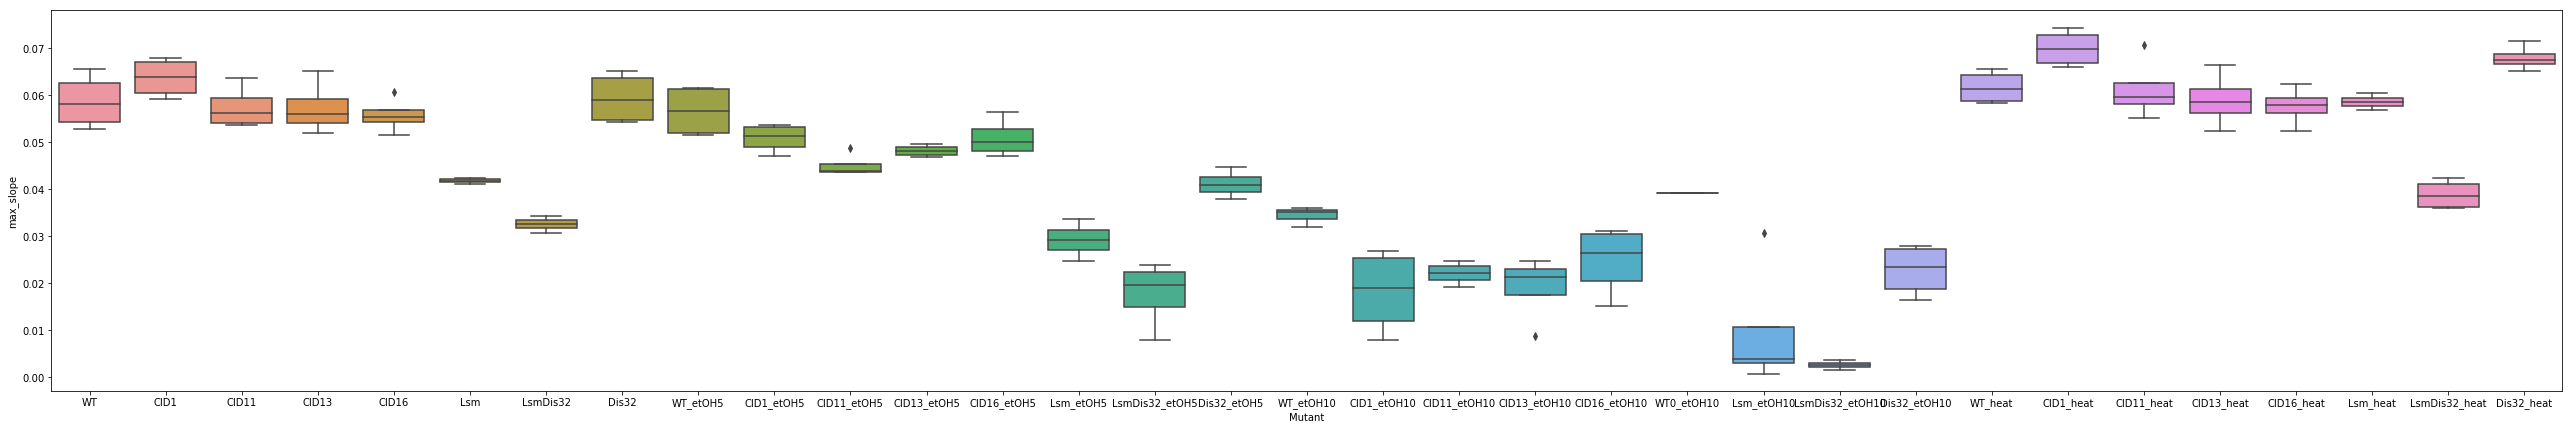

In [147]:
# max_slope
f = plt.figure(figsize=(45,7))
sns.boxplot(x=pyphe_wyniki["Mutant"], y=pyphe_wyniki["max_slope"])
f.savefig("pyphe_max_slope_stres_20190517.png")

In [53]:
new_krzywe_Time_without_first_cell =krzywe_Time_without_first_cell.rename(index=str, columns={"Time": ""})
new_krzywe_Time_without_first_cell.head()

,,JB22.1,JB22.2,JB22ΔCID1.1,JB22ΔCID1.2,JB22ΔCID11.1,JB22ΔCID11.2,JB22ΔCID13.1,JB22ΔCID13.2,JB22ΔCID16.1,...,Blank_etOH5,Blank_etOH5.1,Blank_etOH10,Blank_etOH10.1,BlankH2O2_0.2,BlankH2O2_0.2.1,BlankH2O2.2,BlankH2O2.2.1,Blank.12,Blank.13
0,0.001111,0.107,0.091,0.076,0.101,0.086,0.128,0.142,0.164,0.130,...,0.084,0.114,0.120,0.094,0.158,0.094,0.096,0.103,0.139,0.057
1,1.202500,0.109,0.107,0.130,0.118,0.123,0.122,0.103,0.112,0.104,...,0.125,0.107,0.130,0.126,0.052,0.097,0.061,0.062,0.049,0.067
2,2.452500,0.114,0.118,0.133,0.122,0.131,0.130,0.110,0.115,0.109,...,0.129,0.104,0.125,0.128,0.053,0.097,0.062,0.063,0.048,0.066
3,3.702500,0.125,0.140,0.140,0.136,0.151,0.146,0.134,0.132,0.125,...,0.138,0.115,0.131,0.129,0.055,0.107,0.068,0.070,0.057,0.078
4,4.951944,0.134,0.179,0.158,0.151,0.182,0.178,0.167,0.159,0.150,...,0.138,0.117,0.131,0.131,0.056,0.106,0.066,0.071,0.055,0.079
